# Kīlauea Volcano Hazards Analysis
## GPGN 268 Final Project
#### Clara Pugh and Lillian Hanson

## Put problem statement/introduction

In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

## Lava Flows

Kīlauea Lava Flow Image (Source: USGS Kīlauea Images)
![Kīlauea Lava Flow](../figures/lava-flow-image-USGS.jpg)

In [9]:
# read in data for each shapefile
may24_16 = gpd.read_file('../data/05_2016-17_kilauea_lava_shapefiles/Ep61g_20160524_flow.shp').to_crs(4326)
jun10_16 = gpd.read_file('../data/05_2016-17_kilauea_lava_shapefiles/Ep61g_20160610_flow.shp').to_crs(4326)
jun30_16 = gpd.read_file('../data/05_2016-17_kilauea_lava_shapefiles/Ep61g_20160630_flow.shp').to_crs(4326)
jul19_16 = gpd.read_file('../data/05_2016-17_kilauea_lava_shapefiles/Ep61g_20160719_flow.shp').to_crs(4326)
aug19_16 = gpd.read_file('../data/05_2016-17_kilauea_lava_shapefiles/Ep61g_20160819_flow.shp').to_crs(4326)
sep20_16 = gpd.read_file('../data/05_2016-17_kilauea_lava_shapefiles/Ep61g_20160920_flow.shp').to_crs(4326)
oct19_16 = gpd.read_file('../data/05_2016-17_kilauea_lava_shapefiles/Ep61g_20161019_flow.shp').to_crs(4326)
nov29_16 = gpd.read_file('../data/05_2016-17_kilauea_lava_shapefiles/Ep61g_20161129_flow.shp').to_crs(4326)
dec14_16 = gpd.read_file('../data/05_2016-17_kilauea_lava_shapefiles/Ep61g_20161214_flow.shp').to_crs(4326)
jan12_17 = gpd.read_file('../data/05_2016-17_kilauea_lava_shapefiles/Ep61g_20170112_flow.shp').to_crs(4326)
feb24_17 = gpd.read_file('../data/05_2016-17_kilauea_lava_shapefiles/Ep61g_20170224_flow.shp').to_crs(4326)
mar30_17 = gpd.read_file('../data/05_2016-17_kilauea_lava_shapefiles/Ep61g_20170330_flow.shp').to_crs(4326)
may03_17 = gpd.read_file('../data/05_2016-17_kilauea_lava_shapefiles/Ep61g_20170503_flow.shp').to_crs(4326)
may31_17 = gpd.read_file('../data/05_2016-17_kilauea_lava_shapefiles/Ep61g_20170531_flow.shp').to_crs(4326)

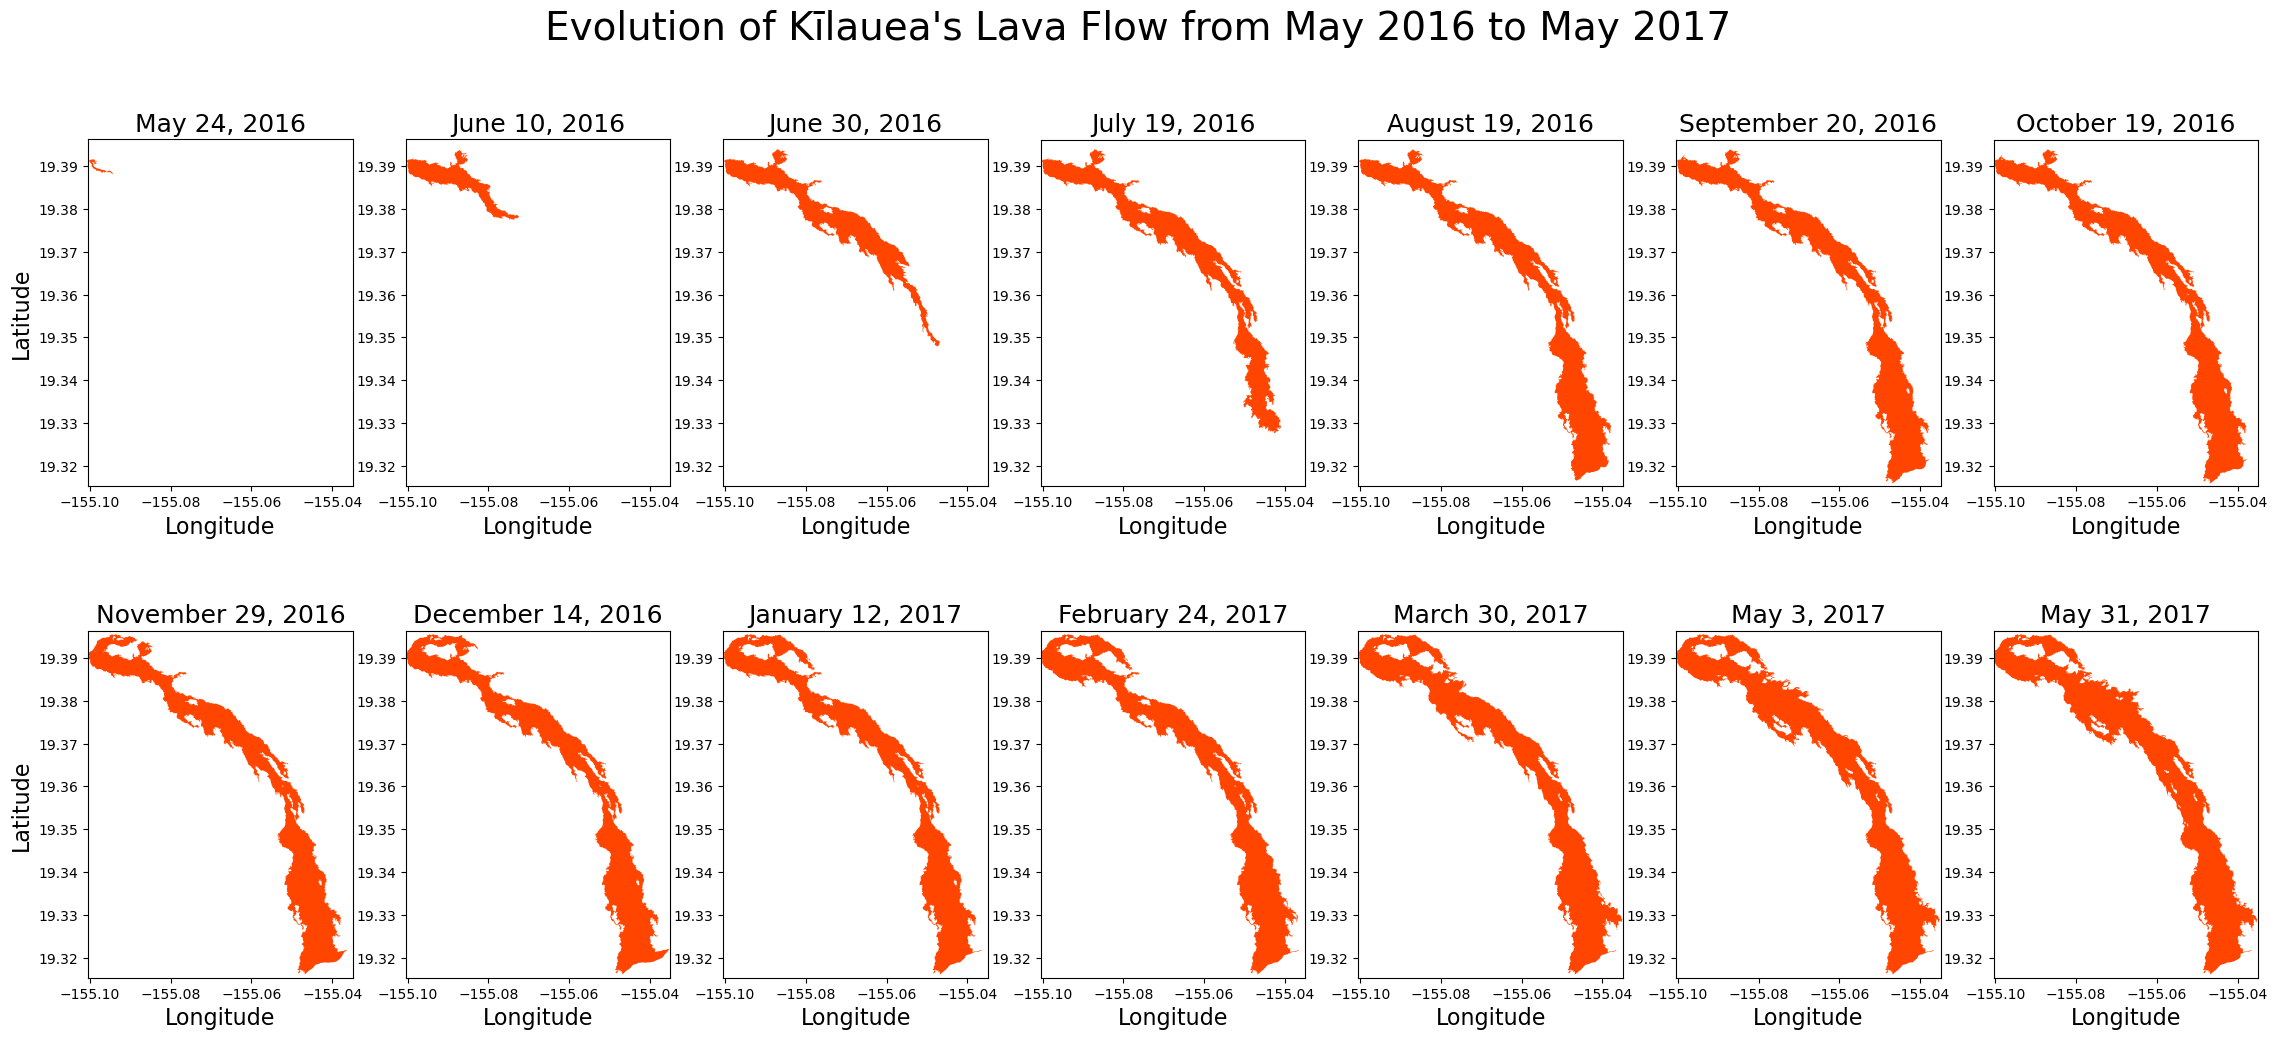

In [10]:
# graph each shapefile on a subplot
fig, axes = plt.subplots(2, 7, figsize=(28, 18))
[ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14] = axes.flatten()
plt.suptitle("Evolution of Kīlauea's Lava Flow from May 2016 to May 2017", fontsize=28, y=0.8)

may24_16.plot(ax=ax1, color='orangered')
ax1.set_title('May 24, 2016', fontsize=18)
ax1.set_xlim([-155.100453,-155.034902])
ax1.set_ylim([19.315307, 19.396264])
ax1.set_ylabel('Latitude', fontsize=16)
ax1.set_xlabel('Longitude', fontsize=16)
ax1.ticklabel_format(style='plain', useOffset=False)

jun10_16.plot(ax=ax2, color='orangered')
ax2.set_title('June 10, 2016', fontsize=18)
ax2.set_xlim([-155.100453,-155.034902])
ax2.set_ylim([19.315307, 19.396264])
ax2.set_xlabel('Longitude', fontsize=16)
ax2.ticklabel_format(style='plain', useOffset=False)

jun30_16.plot(ax=ax3, color='orangered')
ax3.set_title('June 30, 2016', fontsize=18)
ax3.set_xlim([-155.100453,-155.034902])
ax3.set_ylim([19.315307, 19.396264])
ax3.set_xlabel('Longitude', fontsize=16)
ax3.ticklabel_format(style='plain', useOffset=False)

jul19_16.plot(ax=ax4, color='orangered')
ax4.set_title('July 19, 2016', fontsize=18)
ax4.set_xlim([-155.100453,-155.034902])
ax4.set_ylim([19.315307, 19.396264])
ax4.set_xlabel('Longitude', fontsize=16)
ax4.ticklabel_format(style='plain', useOffset=False)

aug19_16.plot(ax=ax5, color='orangered')
ax5.set_title('August 19, 2016', fontsize=18)
ax5.set_xlim([-155.100453,-155.034902])
ax5.set_ylim([19.315307, 19.396264])
ax5.set_xlabel('Longitude', fontsize=16)
ax5.ticklabel_format(style='plain', useOffset=False)

sep20_16.plot(ax=ax6, color='orangered')
ax6.set_title('September 20, 2016', fontsize=18)
ax6.set_xlim([-155.100453,-155.034902])
ax6.set_ylim([19.315307, 19.396264])
ax6.set_xlabel('Longitude', fontsize=16)
ax6.ticklabel_format(style='plain', useOffset=False)

oct19_16.plot(ax=ax7, color='orangered')
ax7.set_title('October 19, 2016', fontsize=18)
ax7.set_xlim([-155.100453,-155.034902])
ax7.set_ylim([19.315307, 19.396264])
ax7.set_xlabel('Longitude', fontsize=16)
ax7.ticklabel_format(style='plain', useOffset=False)

nov29_16.plot(ax=ax8, color='orangered')
ax8.set_title('November 29, 2016', fontsize=18)
ax8.set_xlim([-155.100453,-155.034902])
ax8.set_ylim([19.315307, 19.396264])
ax8.set_ylabel('Latitude', fontsize=16)
ax8.set_xlabel('Longitude', fontsize=16)
ax8.ticklabel_format(style='plain', useOffset=False)

dec14_16.plot(ax=ax9, color='orangered')
ax9.set_title('December 14, 2016', fontsize=18)
ax9.set_xlim([-155.100453,-155.034902])
ax9.set_ylim([19.315307, 19.396264])
ax9.set_xlabel('Longitude', fontsize=16)
ax9.ticklabel_format(style='plain', useOffset=False)

jan12_17.plot(ax=ax10, color='orangered')
ax10.set_title('January 12, 2017', fontsize=18)
ax10.set_xlim([-155.100453,-155.034902])
ax10.set_ylim([19.315307, 19.396264])
ax10.set_xlabel('Longitude', fontsize=16)
ax10.ticklabel_format(style='plain', useOffset=False)

feb24_17.plot(ax=ax11, color='orangered')
ax11.set_title('February 24, 2017', fontsize=18)
ax11.set_xlim([-155.100453,-155.034902])
ax11.set_ylim([19.315307, 19.396264])
ax11.set_xlabel('Longitude', fontsize=16)
ax11.ticklabel_format(style='plain', useOffset=False)

mar30_17.plot(ax=ax12, color='orangered')
ax12.set_title('March 30, 2017', fontsize=18)
ax12.set_xlim([-155.100453,-155.034902])
ax12.set_ylim([19.315307, 19.396264])
ax12.set_xlabel('Longitude', fontsize=16)
ax12.ticklabel_format(style='plain', useOffset=False)

may03_17.plot(ax=ax13, color='orangered')
ax13.set_title('May 3, 2017', fontsize=18)
ax13.set_xlim([-155.100453,-155.034902])
ax13.set_ylim([19.315307, 19.396264])
ax13.set_xlabel('Longitude', fontsize=16)
ax13.ticklabel_format(style='plain', useOffset=False)

may31_17.plot(ax=ax14, color='orangered')
ax14.set_title('May 31, 2017', fontsize=18)
ax14.set_xlim([-155.100453,-155.034902])
ax14.set_ylim([19.315307, 19.396264])
ax14.set_xlabel('Longitude', fontsize=16)
ax14.ticklabel_format(style='plain', useOffset=False)

plt.subplots_adjust(hspace=-0.45)
plt.show()

We can see that there was a lot of expansion of the lava flow from May to August 2016, and then it started slowing down its growth 

## Volcanic Plume

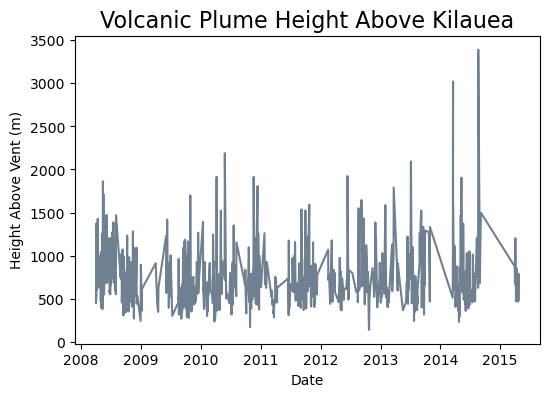

In [8]:
plume_data_2008_2015 = pd.read_csv('../data/plume_heights/EruptionPlumeHeights_2008-2015.csv')

# convert dates from file into numpy datetime64 format
new_dates = []
for dates in plume_data_2008_2015['Date (HST)']:
    date = dates.split(' ')[0]
    date_split = date.split('/')
    month = date_split[0]
    day = date_split[1]
    if len(day) == 1:
        day = f'0{day}'
    if len(month) == 1:
        month = f'0{month}'
    year = date_split[2]
    time = dates.split(' ')[1]
    times = time.split(':')
    hour = times[0]
    if len(hour) == 1:
        hour = f'0{hour}'
    minute = times[1]
    new_dates.append(f'{year}-{month}-{day}T{hour}:{minute}')
date_array = np.array(new_dates, dtype='datetime64')

# put new dates into plume data file
plume_data_2008_2015['date_new'] = date_array
plume_data_2008_2015 = plume_data_2008_2015.set_index('date_new')
plume_data_2008_2015 = plume_data_2008_2015.dropna()

# plot plume data
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.plot(plume_data_2008_2015['Ht above vent elevation (m)'], color='slategrey')
ax.set_xlabel('Date')
ax.set_ylabel('Height Above Vent (m)')
plt.title('Volcanic Plume Height Above Kilauea', fontsize=16)
plt.show()

We see in this that the elevation of the volcanic plume above Kilauea was highly variable, although it reached some peaks around the beginning and middle of 2014. 

## Lava Lake Elevation

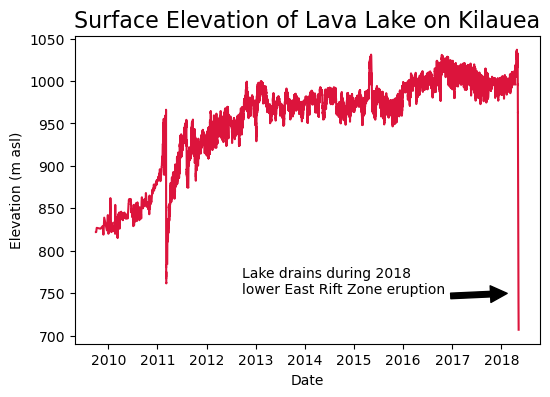

In [7]:
lava_lake_elv = pd.read_csv('../data/ContinuousLavaLakeElevation.txt', sep=',', skiprows=[1])

# convert time of measurement column to a compatible datetime format
lava_lake_elv['Time of measurement(HST)'] = pd.to_datetime(lava_lake_elv['Time of measurement(HST)'], format='ISO8601')
lava_lake_elv = lava_lake_elv.set_index('Time of measurement(HST)')

# plot figure
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.plot(lava_lake_elv['Lake surface elevation(m asl)'], color='crimson')
ax.set_xlabel('Date')
ax.set_ylabel('Elevation (m asl)')
plt.title('Surface Elevation of Lava Lake on Kilauea', fontsize=16)
ax.annotate('Lake drains during 2018\nlower East Rift Zone eruption', xy=(17600,750), 
             xytext =(15600,750), arrowprops = dict(facecolor ='black', shrink = 0.05))
plt.show()

We can see in this that from 2010 to 2018, the surface elevation of the lava lake on Kilauea (within the within Halemaʻumaʻu crater) was rising fairly steadily, until the volcano began to erupt in the 2018 lower East Rift Zone, which pulled a lot of the magma out from the volcano, and caused the lava lake to drain rapidly.

## SO2 Emissions

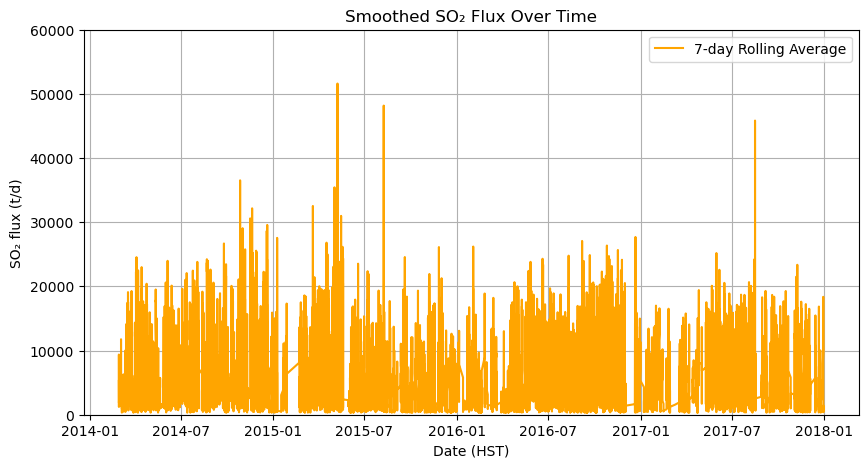

In [6]:
# graph the SO2 emissions data
so2_path = ("../data/2014-17_SO2_emission_rates/SummitSO2_FLYSPECarray_10S_2014-2017.csv")
df3 = pd.read_csv(so2_path,  usecols=['Date (HST)', 'SO2 flux (t/d)']) #create dataframe with the csv data
df3["Date (HST)"] = pd.to_datetime(df3["Date (HST)"], format="ISO8601")
df3 = df3.set_index('Date (HST)')
# Replace non-numeric values (like 'BDL') with NaN
df3['SO2 flux (t/d)'] = pd.to_numeric(df3['SO2 flux (t/d)'], errors='coerce')
# Drop rows with NaN
df3 = df3.dropna(subset=['SO2 flux (t/d)'])

#apply a 7-day rolling average to the emissions data
df3['Smoothed'] = df3['SO2 flux (t/d)'].rolling(window=7, center=True).mean()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(df3.index, df3['Smoothed'], label='7-day Rolling Average', color='orange')
plt.ylabel('SO₂ flux (t/d)')
plt.ylim(0, 60000)
plt.xlabel('Date (HST)')
plt.title('Smoothed SO₂ Flux Over Time')
plt.grid(True)
plt.legend()
plt.show()